# Figure S4: shown that method of Schäfer and Voigt (2018) leads to strong initial cooling, whereas method of Keshtgar et al. (2023) nearly preserves the initial state until the cyclone starts to grow

Illustration based on ICON2.1 simulations.

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

import sys; sys.path.append("../helperfuncs")
from myfunctions import  zlevels, load_data, dict_expid

## Load ICON2.1 data for no radiation, clear-sky radiation, all-sky radiation and cloud-radiative heating only.

In [2]:
explist=list()
for expid in dict_expid.keys():
    if "ICON2.1" in dict_expid[expid]:
        explist.append(load_data(expid=expid, chunks="auto"))

In [3]:
# time information in units of days
time = np.arange(0,explist[0].time.size/4,0.25)
# index of timestep "day 3"
time3d = np.argmin(np.abs(time-3))

## Make zonal-mean plots of changes in temperature and zonal wind.

In [4]:
def beautify_plot():
    plt.ylim(0,14)
    plt.xticks([-80, -60, -40, -20, 0, 20, 40, 60, 80], ["80S", "60S", "40S", "20S", "Eq", "20N", "40N", "60N", "80N"], fontsize=10)
    plt.xlabel("deg latitude", loc="right", size=10)
    plt.ylabel("height / km", loc="top", size=10)
    plt.yticks([0,2,4,6,8,10,12,14], ["0", "2", "4", "6", "8", "10", "12", "14"], fontsize=10)

Position of upper-left plot, useful for positioning the color bar for the initial state: AxesSubplot(0.125,0.71587;0.352273x0.16413)
Position of lower-right plot, useful for positioning the color bar for the change at day 3: AxesSubplot(0.547727,0.125;0.352273x0.16413)


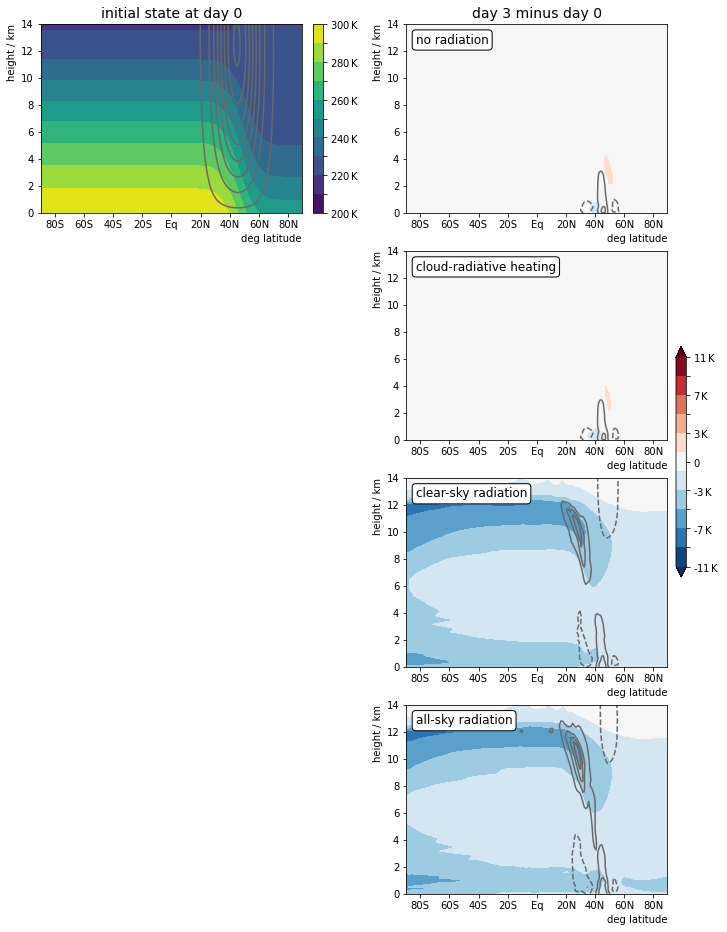

In [5]:
fig=plt.figure(figsize=(12,16))

ax=plt.subplot(4,2,1)
print("Position of upper-left plot, useful for positioning the color bar for the initial state:", ax)
ds = [ds for ds in explist if ds.attrs["setup"]=="ICON2.1 NORAD"][0]
c1 = plt.contourf(ds.lat, zlevels(), ds["temp"].isel(time=0).mean("lon"), levels=np.linspace(200,300,11))
cs = plt.contour(ds.lat, zlevels(), ds["u"].isel(time=0).mean("lon"), colors="dimgrey", levels=np.linspace(2,62,11))
#plt.clabel(cs, inline=True, fontsize=8)
plt.title("initial state at day 0", size=14)
beautify_plot()

dlev_t = [-11,-9,-7,-5,-3,-1,1,3,5,7,9,11]
dlev_u = [-4,-3,-2,-1,1,2,3,4]

ax=plt.subplot(4,2,2)
ds = [ds for ds in explist if ds.attrs["setup"]=="ICON2.1 NORAD"][0]
plt.contourf(ds.lat, zlevels(), ds["temp"].isel(time=time3d).mean("lon") - ds["temp"].isel(time=0).mean("lon"), levels=dlev_t, cmap="RdBu_r")
cs=plt.contour(ds.lat, zlevels(), ds["u"].isel(time=time3d).mean("lon") - ds["u"].isel(time=0).mean("lon"), colors="dimgrey", levels=dlev_u)
#plt.clabel(cs)
plt.title("day 3 minus day 0", size=14)
plt.text(-83,13.3, "no radiation", size=12, va="top", ha="left", bbox=dict(facecolor="white", edgecolor="black", boxstyle="round,pad=0.3"))
beautify_plot()

ax=plt.subplot(4,2,4)
ds = [ds for ds in explist if ds.attrs["setup"]=="ICON2.1 CRHONLY"][0]
plt.contourf(ds.lat, zlevels(), ds["temp"].isel(time=time3d).mean("lon") - ds["temp"].isel(time=0).mean("lon"), levels=dlev_t, cmap="RdBu_r")
cs=plt.contour(ds.lat, zlevels(), ds["u"].isel(time=time3d).mean("lon") - ds["u"].isel(time=0).mean("lon"), colors="dimgrey", levels=dlev_u)
#plt.clabel(cs)
plt.text(-83,13.3, "cloud-radiative heating", size=12, va="top", ha="left", bbox=dict(facecolor="white", edgecolor="k", boxstyle="round,pad=0.3"))
beautify_plot()

ax=plt.subplot(4,2,6)
ds = [ds for ds in explist if ds.attrs["setup"]=="ICON2.1 CLRSKYRAD"][0]
plt.contourf(ds.lat, zlevels(), ds["temp"].isel(time=time3d).mean("lon") - ds["temp"].isel(time=0).mean("lon"), levels=dlev_t, cmap="RdBu_r", extend="both")
cs=plt.contour(ds.lat, zlevels(), ds["u"].isel(time=time3d).mean("lon") - ds["u"].isel(time=0).mean("lon"), colors="dimgrey", levels=dlev_u)
#plt.clabel(cs)
plt.text(-83,13.3, "clear-sky radiation", size=12, va="top", ha="left", bbox=dict(facecolor="white", edgecolor="k", boxstyle="round,pad=0.3"))
beautify_plot()

ax=plt.subplot(4,2,8)
print("Position of lower-right plot, useful for positioning the color bar for the change at day 3:", ax)
ds = [ds for ds in explist if ds.attrs["setup"]=="ICON2.1 ALLSKYRAD"][0]
c2=plt.contourf(ds.lat, zlevels(), ds["temp"].isel(time=time3d).mean("lon") - ds["temp"].isel(time=0).mean("lon"), levels=dlev_t, cmap="RdBu_r", extend="both")
cs=plt.contour(ds.lat, zlevels(), ds["u"].isel(time=time3d).mean("lon") - ds["u"].isel(time=0).mean("lon"), colors="dimgrey", levels=dlev_u)
#plt.clabel(cs)
plt.ylim(0,14)
plt.text(-83,13.3, "all-sky radiation", size=12, va="top", ha="left", bbox=dict(facecolor="white", edgecolor="k", boxstyle="round,pad=0.3"))
beautify_plot()

# make colorbars for initial state (c1) and change (c2)
fig.subplots_adjust(right=0.85, wspace=0.4)
# initial state
cbar_ax = fig.add_axes([0.44, 0.71587, 0.012, 0.16413])
cbar=plt.colorbar(c1, cax=cbar_ax, orientation='vertical')
cbar.set_ticks(np.linspace(200,300,11))
cbar.set_ticklabels(["200$\,$K","","220$\,$K","","240$\,$K","","260$\,$K","","280$\,$K","","300$\,$K"], fontsize=10)
# change
cbar_ax = fig.add_axes([0.86, 0.5-0.5*0.2, 0.012, 0.2])
cbar=plt.colorbar(c2, cax=cbar_ax, orientation='vertical')
cbar.set_ticks([-11,-9,-7,-5,-3,0,3,5,7,9,11])
cbar.set_ticklabels(["-11$\,$K","","-7$\,$K","","-3$\,$K","0$\,$","3$\,$K","","7$\,$K","","11$\,$K"], fontsize=10)

plt.savefig("figure_S4.pdf")
plt.show()